In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

/home/twright/Drive/Documents/PhD/Notebooks/notebooks/genetic_oscillator_benchmarking.py:110: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Properties

In [2]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [3]:
Q = Atomic(var("x4") > 1/50); Q

Atomic(x4 > (1/50))

In [4]:
I = RIF(3, 3.5)

## Launch Runs

In [5]:
num_runs = 1
duration = 2

In [6]:
results = []

In [7]:
results.extend(gen_results(
    num_runs,
    P,
    5,
    task_description='Unmasked P',
    use_masks=False,
    symbolic_composition=True,
))

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
calling reach with y0 = ['[0.

fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
PolyObserver(x4 - 0.0004000000000000000?, <flowstar.reachability.Reach object at 0x7f372564ac80>, x2*x6 - 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = x2*x6 - 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 38.66 seconds
roots = [[1.6615745286198686 .. 1.6620000000000260], [1.6636330204790832 .. 2.1450000000000445]]
domain = [0.0000000000000000 .. 5.5020000000000007]
roots = [[1.6615745286198686 .. 1.6620000000000260], 
 [1.6636330204790832 .. 2.1450000000000445]]
seg_domain = [0.0000000000000000 .. 5.5020000000000007]
roots = [[1.6615745286198686 .. 1.6620000000000260], 
 [1.6636330204790832 .. 2.1450000000000445]]
signal given bool roots: 1 items in 0.02 

 [3.5805000731185727 .. 5.0040000000001533]]
0 at 5.00200000000000
signal given bool roots: 1 items in 0.17 seconds
ran "Precomposing Contexts" 1 times in 3.5762786865234375e-05
ran "restoring globals" 9 times in 0.0008282661437988281
ran "capturing globals [on exit]" 9 times in 0.00046181678771972656
ran "Running Flow*" 1 times in 66.30718731880188
ran "mask intersect check" 1668 times in 0.004282712936401367
ran "tentative eval" 1668 times in 2.083970308303833
ran "composing flowpipe" 548 times in 40.95096039772034
ran "whole domain eval" 538 times in 1.1292974948883057
ran "post retrieve" 476 times in 0.0049402713775634766
ran "root detection" 476 times in 3.995781660079956
ran "root amalgamation" 476 times in 0.0018107891082763672
ran "prepare in check" 11 times in 0.00011301040649414062
ran "check boolean [unguarded]" 11 times in 0.1064445972442627
ran "observer.check" 11 times in 0.1077122688293457
ran "Monitoring atomic x4 > (1/2500)" 1 times in 48.53640818595886
ran "Monitoring

ran "observer.check" 3 times in 0.013394355773925781
ran "Monitoring atomic x4 > (3/2500)" 1 times in 55.454187870025635
ran "Monitoring Signal for x4 > (3/2500)" 1 times in 55.49084281921387
Run done in 145.3137707710266 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f371f618840>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.0799999999

ran "root amalgamation" 746 times in 0.0024907588958740234
ran "prepare in check" 8 times in 8.702278137207031e-05
ran "check boolean [unguarded]" 8 times in 0.044709205627441406
ran "observer.check" 8 times in 0.0453946590423584
ran "Monitoring atomic x4 > (3/1250)" 1 times in 61.62511134147644
ran "Monitoring Signal for x4 > (3/1250)" 1 times in 61.66283202171326
Run done in 130.08298873901367 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f371f61eb40>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']


C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 71.78 seconds
roots = [[2.4352692072635453 .. 2.4360000000000555], [2.4375031482227860 .. 5.0040000000001533]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[2.4352692072635453 .. 2.4360000000000555], 
 [2.4375031482227860 .. 5.0040000000001533]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[2.4352692072635453 .. 2.4360000000000555], 
 [2.4375031482227860 .. 5.0040000000001533]]
0 at 5.00200000000000
signal given bool roots: 1 items in 0.02 seconds
ran "Precomposing Contexts" 1 times in 9.059906005859375e-06
ran "restoring globals" 9 times in 0.000820159912109375
ran "capturing globals [on exit]" 9 times in 0.00043845176696777344
ran "Running Flow*" 1 ti

ran "prepare in check" 2 times in 2.47955322265625e-05
ran "check boolean [unguarded]" 2 times in 0.010434389114379883
ran "observer.check" 2 times in 0.010616302490234375
ran "Monitoring atomic x4 > (11/2500)" 1 times in 83.34988856315613
ran "Monitoring Signal for x4 > (11/2500)" 1 times in 85.03363943099976
Run done in 143.729594707489 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f371f61e740>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initial

ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 82.67 seconds
roots = [[2.0906437459794733 .. 2.0910000000000424], [2.0925085328961814 .. 4.2210000000001236], [4.2218866342209819 .. 4.2218867121092254], [4.2219100805081533 .. 4.2219101881318962], [4.2219218624419267 .. 4.2219219055352433], [4.2219337283920221 .. 4.2219340068498586], [4.2219454665471287 .. 4.2219454706745081], [4.2219570774692964 .. 4.2219573133913953], [4.2219687715522882 .. 4.2219689462835666], [4.2219805463607071 .. 4

 [4.6875005337942958 .. 5.0040000000001533]]
0 at 5.00200000000000
signal given bool roots: 1 items in 1.77 seconds
ran "Precomposing Contexts" 1 times in 1.0013580322265625e-05
ran "restoring globals" 9 times in 0.0007598400115966797
ran "capturing globals [on exit]" 9 times in 0.00043964385986328125
ran "Running Flow*" 1 times in 60.671544790267944
ran "mask intersect check" 1668 times in 0.0033621788024902344
ran "tentative eval" 1668 times in 1.6688017845153809
ran "composing flowpipe" 1133 times in 68.23835492134094
ran "whole domain eval" 1053 times in 1.9983057975769043
ran "post retrieve" 818 times in 0.007359504699707031
ran "root detection" 818 times in 10.620406866073608
ran "root amalgamation" 818 times in 0.003167390823364258
ran "prepare in check" 82 times in 0.0005428791046142578
ran "check boolean [unguarded]" 82 times in 0.6100423336029053
ran "observer.check" 82 times in 1.7523889541625977
ran "Monitoring atomic x4 > (13/2500)" 1 times in 84.45303249359131
ran "Monito

ran "Precomposing Contexts" 1 times in 7.867813110351562e-06
ran "restoring globals" 9 times in 0.001008749008178711
ran "capturing globals [on exit]" 9 times in 0.0006022453308105469
ran "Running Flow*" 1 times in 59.976033449172974
ran "mask intersect check" 1668 times in 0.003499746322631836
ran "tentative eval" 1668 times in 1.8024077415466309
ran "composing flowpipe" 628 times in 42.20902633666992
ran "whole domain eval" 628 times in 1.2936232089996338
ran "post retrieve" 502 times in 0.004622220993041992
ran "root detection" 502 times in 2.1516683101654053
ran "root amalgamation" 502 times in 0.0018963813781738281
ran "prepare in check" 2 times in 1.9788742065429688e-05
ran "check boolean [unguarded]" 2 times in 0.0009369850158691406
ran "observer.check" 2 times in 0.0010881423950195312
ran "Monitoring atomic x4 > (17/2500)" 1 times in 47.57560873031616
ran "Monitoring Signal for x4 > (17/2500)" 1 times in 47.63191556930542
Run done in 107.80119061470032 sec
options: {'instrument

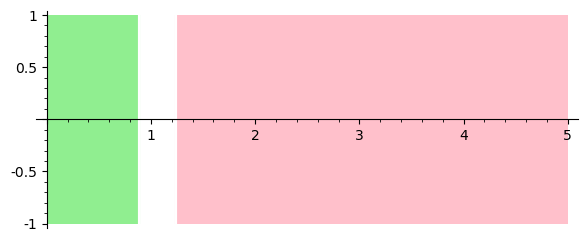

In [21]:
sigP = results[0]['future'].result()[0]
sigP.plot()

In [8]:
results.append(gen_results_async(
    num_runs,
    P & F(I, Atomic(var("x4") > 1/100)),
    duration,
    task_description='Unmasked P & F(x4 > 1/100)',
    use_masks=False,
    symbolic_composition=True,
))

In [9]:
results

[{'prop': Atomic(x6 > 1),
  'duration': 5,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'future': <Future at 0x7f371f60aa90 state=running>},
 <Future at 0x7f371f628f40 state=running>]

In [23]:
results[1].result()

[{'prop': And([Atomic(x6 > 1), F([3.0000000000000000 .. 3.5000000000000000], Atomic(x4 > (1/100)))]),
  'duration': 2,
  'kwargs': {'use_masks': False, 'symbolic_composition': True},
  'result': (Signal([0.0000000000000000 .. 2.0000000000000000], [([0.0000000000000000 .. 2.0000000000000000], False)], mask=None),
   96.57678556442261,
   <flowstar.instrumentation.AggregateMetric object at 0x7ff27a958300>)}]

In [19]:
results[0]['future'].result()

(Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.89947017268536378], True), ([1.2422917684744148 .. 5.0000000000000000], False)], mask=None),
 55.859720945358276,
 <flowstar.instrumentation.AggregateMetric object at 0x7ff27a953a80>)

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 48

In [13]:
srange(0, 3/25, (1/25)**2)

[0,
 1/625,
 2/625,
 3/625,
 4/625,
 1/125,
 6/625,
 7/625,
 8/625,
 9/625,
 2/125,
 11/625,
 12/625,
 13/625,
 14/625,
 3/125,
 16/625,
 17/625,
 18/625,
 19/625,
 4/125,
 21/625,
 22/625,
 23/625,
 24/625,
 1/25,
 26/625,
 27/625,
 28/625,
 29/625,
 6/125,
 31/625,
 32/625,
 33/625,
 34/625,
 7/125,
 36/625,
 37/625,
 38/625,
 39/625,
 8/125,
 41/625,
 42/625,
 43/625,
 44/625,
 9/125,
 46/625,
 47/625,
 48/625,
 49/625,
 2/25,
 51/625,
 52/625,
 53/625,
 54/625,
 11/125,
 56/625,
 57/625,
 58/625,
 59/625,
 12/125,
 61/625,
 62/625,
 63/625,
 64/625,
 13/125,
 66/625,
 67/625,
 68/625,
 69/625,
 14/125,
 71/625,
 72/625,
 73/625,
 74/625]

In [11]:
results_Q = [gen_results(
    1,
    Atomic(var("x4") > k),
    5,
    task_description=f'x4 > {k}',
    use_masks=False,
    symbolic_composition=False,
) for k in srange(0, 1/125, (1/25)**2/4)]

In [14]:
futures(sum(results_Q, []))

[<Future at 0x7f3740bca0d0 state=finished returned tuple>,
 <Future at 0x7f371f628bb0 state=finished returned tuple>,
 <Future at 0x7f3740bcab80 state=finished returned tuple>,
 <Future at 0x7f371f637250 state=finished returned tuple>,
 <Future at 0x7f371f6378e0 state=finished returned tuple>,
 <Future at 0x7f371f637fa0 state=finished returned tuple>,
 <Future at 0x7f3740bd5670 state=finished returned tuple>,
 <Future at 0x7f3740bd5b50 state=finished returned tuple>,
 <Future at 0x7f3740bd83a0 state=finished returned tuple>,
 <Future at 0x7f3740bd8a90 state=finished returned tuple>,
 <Future at 0x7f3740be02e0 state=finished returned tuple>,
 <Future at 0x7f3740be0970 state=finished returned tuple>,
 <Future at 0x7f3740be0e80 state=finished returned tuple>,
 <Future at 0x7f3740be54f0 state=finished returned tuple>,
 <Future at 0x7f3740be5b80 state=finished returned tuple>,
 <Future at 0x7f3740bec430 state=finished returned tuple>,
 <Future at 0x7f3740bec8e0 state=finished returned tuple

In [15]:
[
    res.result()[0]
    for res in futures(sum(results_Q, []))
]

[Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.7824741060815575], True), ([3.7824741896195614 .. 3.7824859156951521], True), ([3.7824859512122475 .. 3.7826221312433548], True), ([3.7826222181614284 .. 3.7826276425161516], True), ([3.7826277088585436 .. 3.7826328774193297], True), ([3.7830000000001064 .. 3.7845015154247741], True)], mask=None),
 Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 3.5782593492649593], True), ([3.5790000000000987 .. 3.5802518354777595], True), ([3.5802518795888684 .. 3.5802634910673166], True), ([3.5802635104677498 .. 3.5804451257981476], True), ([3.5804451684454972 .. 3.5804479842575599], True), ([3.5804480220179368 .. 3.5804907610148398], True), ([3.5804907637023926 .. 3.5804914542295188], True), ([3.5804914555403239 .. 3.5804987903356911], True), ([3.5804987978998172 .. 3.5804991251056007], True), ([3.5804991321773904 .. 3.5805000731185728], True)], mask=None),
 Signal([0.0000000000000000 .. 5.000

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


Animation with 20 frames
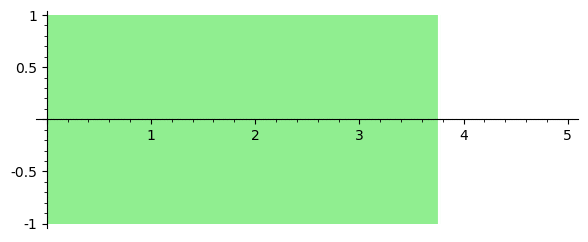

In [16]:
animate([
    res.result()[0].plot()
    for res in futures(sum(results_Q, []))
])

In [17]:
from sage.repl.ipython_kernel.interact import interact

In [19]:
@interact
def _(i=slider(0, len(results_Q) - 1)):
    k = list(srange(0, 1/125, (1/25)**2/4))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q, []))[i].result()[0]
    return (~sigQ).plot()

Interactive function <function _ at 0x7f3740ad10d0> with 1 widget
  i: TransformIntSlider(value=0, description…

In [24]:
@interact
def _(i=slider(0, len(results_Q) - 1)):
    k = list(srange(0, 1/125, (1/25)**2/4))[i]
    print(f"result {i} with k={k}")
    sigQ = futures(sum(results_Q, []))[i].result()[0]
    sigP.plot().show()
    (~sigQ).F(I).plot().show()
    (sigP | (~sigQ).F(I)).plot().show()

Interactive function <function _ at 0x7f3740814dc0> with 1 widget
  i: TransformIntSlider(value=0, description…

In [26]:
restart_pool()